# Binary Target Illustration

In [3]:
import os
import platform

import utils

In [38]:
# Store the plot as pdf
# STORE = False
STORE = True

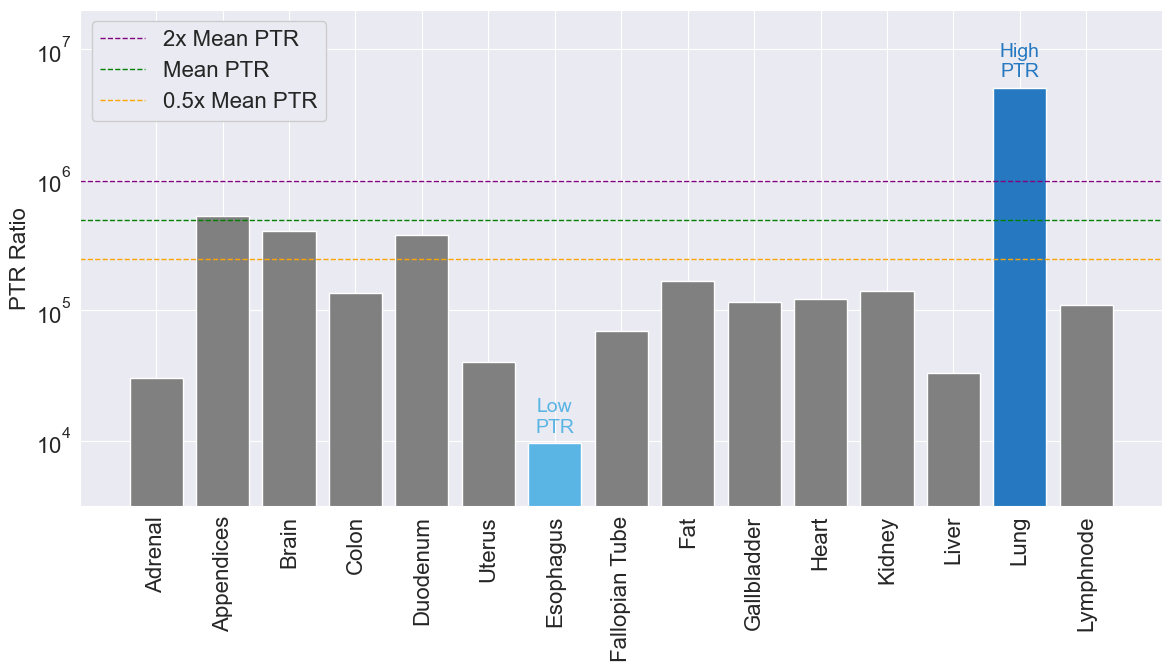

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Tissue names and PTR values
tissue_names = [
    'Adrenal', 'Appendices', 'Brain', 'Colon', 'Duodenum',
    'Uterus', 'Esophagus', 'Fallopian Tube', 'Fat', 'Gallbladder',
    'Heart', 'Kidney', 'Liver', 'Lung', 'Lymphnode'
]
log10_ptr_values = [4.485, 5.723, 5.608, 5.13, 5.577, 4.604, 3.984,  
                    4.845, 5.225, 5.067, 5.087, 5.149, 4.52, 
                    6.705, 5.039]

# Convert log10 values back to linear scale for calculations
ptr_values = 10 ** np.array(log10_ptr_values)

# Calculate thresholds
mean_ptr = np.mean(ptr_values)
low_threshold = 0.5 * mean_ptr
high_threshold = 2 * mean_ptr

# Identify the lowest entry for marking low PTR
lowest_index = np.argmin(log10_ptr_values)

# Color coding for bars
colors = [
    "#5AB4E4" if i == lowest_index else "#2679C0" if v > np.log10(high_threshold) else 'gray'
    for i, v in enumerate(log10_ptr_values)
]

# Plotting
plt.figure(figsize=(12, 7))
plt.rcParams.update({'font.size': 16})
plt.bar(tissue_names, ptr_values, color=colors, log=True)
plt.axhline(high_threshold, color='purple', linestyle='--', linewidth=1, label='2x Mean PTR')
plt.axhline(mean_ptr, color='green', linestyle='--', linewidth=1, label='Mean PTR')
plt.axhline(low_threshold, color='orange', linestyle='--', linewidth=1, label='0.5x Mean PTR')

# Adding annotations for low/high PTR
for i, v in enumerate(ptr_values):
    if i == lowest_index:
        plt.text(i, v * 1.2, 'Low\nPTR', color="#5AB4E4", ha='center', fontsize=14)
    elif v > high_threshold:
        plt.text(i, v * 1.2, 'High\nPTR', color="#2679C0", ha='center', fontsize=14)

# Customizing the plot
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.ylabel('PTR Ratio')
plt.ylim(10 ** 3.5, 10 ** 7.3)  # Set limits based on range
# move x-axis labels just a bit to the left
plt.xticks(rotation=90, ha='center')
plt.legend(loc='upper left', framealpha=1)
plt.tight_layout()

if STORE:
    plt.savefig(os.getenv("OUTPUT_DIR") + "/binary_target_illustration_log.pdf", format="pdf", bbox_inches="tight")

plt.show()